## पाण्डासका आधारभूत उदाहरणहरू

यो नोटबुकले तपाईंलाई केही धेरै आधारभूत पाण्डास अवधारणाहरू मार्फत लैजानेछ। हामी सामान्य डेटा विज्ञान पुस्तकालयहरू आयात गरेर सुरु गर्नेछौं:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### श्रृंखला

श्रृंखला सूची वा 1D-array जस्तै हो, तर यसमा सूचकांक हुन्छ। सबै कार्यहरू सूचकांकसँग मिलाइएका हुन्छन्।


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


सिरिजको एक सामान्य प्रयोग **समय सिरिज** हो। समय सिरिजमा, इन्डेक्सको विशेष संरचना हुन्छ - प्रायः मितिहरू वा समयहरूको दायरा। हामी यस्तो इन्डेक्स `pd.date_range` प्रयोग गरेर बनाउन सक्छौं।

मानौं, हामीसँग एउटा सिरिज छ जसले प्रत्येक दिन किनेको उत्पादनको परिमाण देखाउँछ, र हामीलाई थाहा छ कि प्रत्येक आइतबार हामीले आफ्नै लागि पनि एउटा वस्तु लिनुपर्छ। यहाँ सिरिज प्रयोग गरेर त्यसलाई कसरी मोडल गर्ने:


Length of index is 366


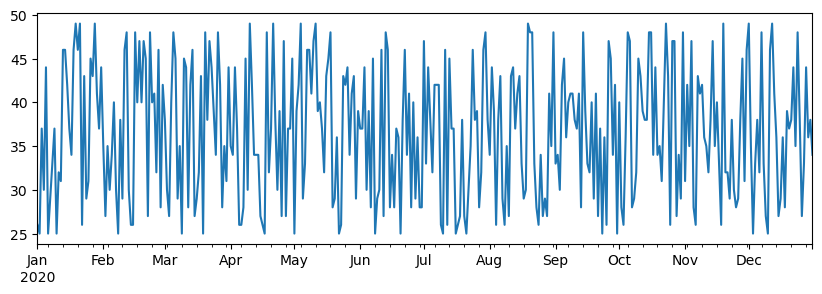

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


जसरी तपाईं देख्न सक्नुहुन्छ, हामी यहाँ समस्याहरू सामना गरिरहेका छौं, किनभने साप्ताहिक श्रृंखलामा उल्लेख नगरिएका दिनहरू हराइरहेको (`NaN`) मानिन्छ, र `NaN` लाई कुनै संख्यामा थप्दा हामीलाई `NaN` प्राप्त हुन्छ। सही परिणाम प्राप्त गर्नको लागि, श्रृंखला थप्दा हामीले `fill_value` निर्दिष्ट गर्न आवश्यक छ:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


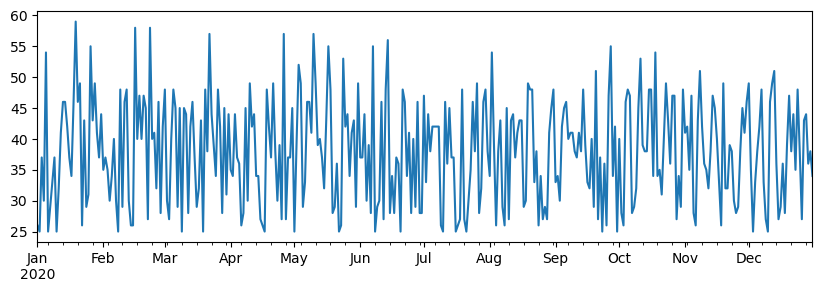

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

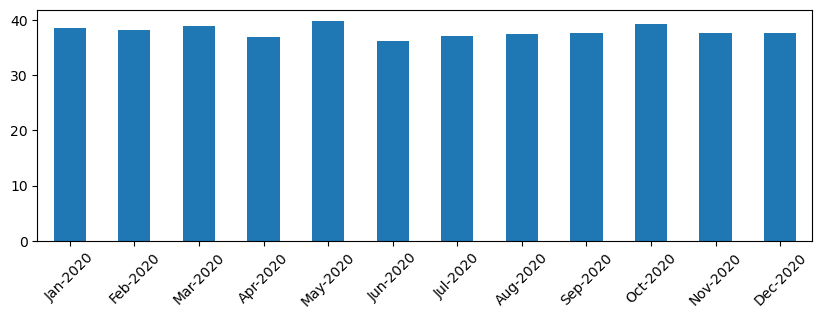

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## डाटा फ्रेम

डाटा फ्रेम मूलतः एउटै इन्डेक्स भएका धेरै सिरिजहरूको संग्रह हो। हामी धेरै सिरिजहरूलाई सँगै राखेर डाटा फ्रेम बनाउन सक्छौं। माथि परिभाषित गरिएको `a` र `b` सिरिजलाई लिएर:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

हामी श्रृंखला स्तम्भहरूका रूपमा पनि प्रयोग गर्न सक्छौं, र स्तम्भका नामहरू शब्दकोश प्रयोग गरेर निर्दिष्ट गर्न सक्छौं:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

उही नतिजा ट्रान्सपोज गरेर (र त्यसपछि स्तम्भहरूको नाम परिवर्तन गरेर, अघिल्लो उदाहरणसँग मिलाउन) प्राप्त गर्न सकिन्छ:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

डेटाफ्रेमबाट **स्तम्भहरू चयन गर्नु** यसरी गर्न सकिन्छ:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


फिल्टर अभिव्यक्तिमा आधारित पंक्तिहरू चयन गर्दै:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

यसले काम गर्ने तरिका यो हो कि अभिव्यक्ति `df['A']<5` ले एउटा बूलियन श्रृंखला फिर्ता गर्छ, जसले श्रृंखलाका प्रत्येक तत्वहरूको लागि अभिव्यक्ति `साँचो` वा `झुटो` छ भनेर जनाउँछ। जब श्रृंखला सूचकांकको रूपमा प्रयोग गरिन्छ, यसले DataFrame मा पङ्क्तिहरूको उपसमूह फिर्ता गर्छ। त्यसैले मनमानी पायथन बूलियन अभिव्यक्ति प्रयोग गर्नु सम्भव छैन, उदाहरणका लागि, `df[df['A']>5 and df['A']<7]` लेख्नु गलत हुनेछ। यसको सट्टा, तपाईले बूलियन श्रृंखलामा विशेष `&` अपरेशन प्रयोग गर्नुपर्छ:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

नयाँ गणनायोग्य स्तम्भहरू सिर्जना गर्दै। हामी सहज अभिव्यक्तिहरू प्रयोग गरेर हाम्रो DataFrame का लागि नयाँ गणनायोग्य स्तम्भहरू सजिलै सिर्जना गर्न सक्छौं। तलको कोडले A को यसको औसत मानबाट विचलन गणना गर्दछ।


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

के हुन्छ भने हामी एउटा श्रृंखला गणना गर्दैछौं, र त्यसपछि यो श्रृंखला बायाँपट्टि असाइन गर्दै, अर्को स्तम्भ सिर्जना गर्दैछौं।


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

संख्या आधारित पङ्क्तिहरू चयन गर्नु `iloc` संरचना प्रयोग गरेर गर्न सकिन्छ। उदाहरणका लागि, DataFrame बाट पहिलो ५ पङ्क्तिहरू चयन गर्न:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**समूहबद्धता** प्रायः Excel मा *पिभट तालिकाहरू* जस्तै परिणाम प्राप्त गर्न प्रयोग गरिन्छ। मानौं हामी `LenB` को प्रत्येक दिइएको संख्याको लागि स्तम्भ `A` को औसत मान गणना गर्न चाहन्छौं। त्यसपछि हामी हाम्रो DataFrame लाई `LenB` द्वारा समूहबद्ध गर्न सक्छौं, र `mean` कल गर्न सक्छौं:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

यदि हामीले समूहमा औसत र तत्वहरूको संख्या गणना गर्न आवश्यक छ भने, हामी थप जटिल `aggregate` फंक्शन प्रयोग गर्न सक्छौं:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## प्रिन्टिङ र प्लटिङ

डाटा वैज्ञानिकले प्रायः डाटालाई अन्वेषण गर्नुपर्छ, त्यसैले यसलाई दृश्यात्मक बनाउन सक्षम हुनु महत्त्वपूर्ण छ। जब DataFrame ठूलो हुन्छ, धेरै पटक हामी केवल यो सुनिश्चित गर्न चाहन्छौं कि हामी सबै कुरा सही गरिरहेका छौं, त्यसका लागि पहिलो केही पङ्क्तिहरू प्रिन्ट गरेर हेर्छौं। यो `df.head()` कल गरेर गर्न सकिन्छ। यदि तपाईं यसलाई Jupyter Notebook बाट चलाउँदै हुनुहुन्छ भने, यसले DataFrame लाई राम्रो तालिकात्मक स्वरूपमा प्रिन्ट गर्छ।


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

हामीले केही स्तम्भहरूलाई दृश्यात्मक बनाउन `plot` फंक्शनको प्रयोग पनि देखेका छौं। `plot` धेरै कार्यहरूको लागि धेरै उपयोगी छ, र `kind=` प्यारामिटर मार्फत विभिन्न प्रकारका ग्राफहरूलाई समर्थन गर्दछ। तर, तपाईं सधैं केही अझ जटिल कुरा प्लट गर्न कच्चा `matplotlib` पुस्तकालय प्रयोग गर्न सक्नुहुन्छ। हामी डाटा दृश्यात्मकताबारे विस्तृत रूपमा छुट्टै पाठहरूमा छलफल गर्नेछौं।


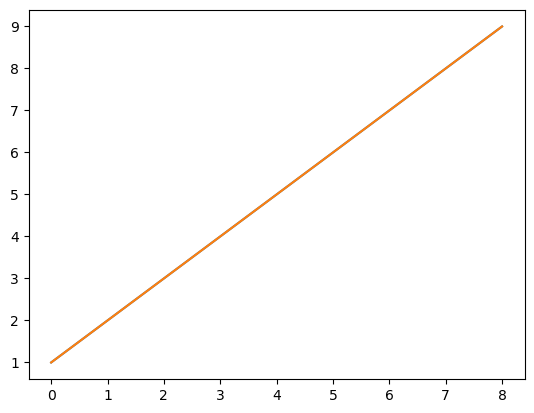

In [61]:
df['A'].plot()
plt.show()

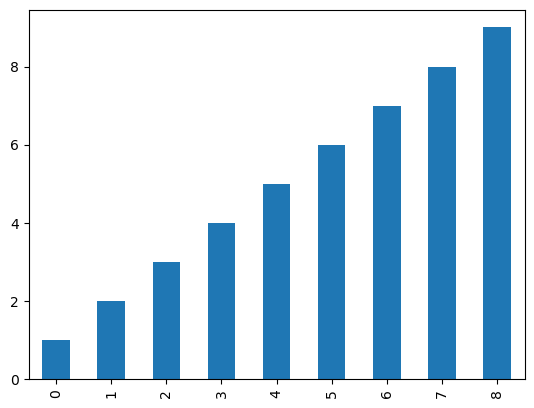

In [63]:
df['A'].plot(kind='bar')
plt.show()

यो अवलोकनले Pandas का सबैभन्दा महत्त्वपूर्ण अवधारणाहरू समेट्छ, तर यो पुस्तकालय अत्यन्त समृद्ध छ, र यससँग के गर्न सकिन्छ भन्नेमा कुनै सीमा छैन! अब, यो ज्ञानलाई प्रयोग गरेर विशेष समस्याहरू समाधान गरौं।



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरी अनुवाद गरिएको हो। हामी यथासम्भव सटीकता सुनिश्चित गर्न प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटिहरू वा अशुद्धताहरू हुन सक्छन्। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्त्वपूर्ण जानकारीका लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याका लागि हामी जिम्मेवार हुने छैनौं।
